In [123]:
import pandas as pd
import numpy as np

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline
import matplotlib.pyplot as plt

from operator import itemgetter  

from sklearn.metrics import plot_confusion_matrix

import os

# Evaluation

## Last-layer features

In [225]:
last_features_class1_path = "./output/went_icu_sel_proc_aug4.csv" #"./output/1-2_icu_18feat.csv"
last_features_class2_path = "./output/not_went_icu_sel_proc_aug4.csv" #"./output/1-2_not_icu_18feat.csv"

In [226]:
last_features_class1 = pd.read_csv(last_features_class1_path)
last_features_class1 = last_features_class1.iloc[:,1:].to_numpy()

print(last_features_class1.shape)

(455, 18)


In [227]:
last_features_class2 = pd.read_csv(last_features_class2_path)
last_features_class2 = last_features_class2.iloc[:,1:].to_numpy()

print(last_features_class2.shape)

(585, 18)


In [228]:
#concatenate
last_features = np.concatenate((last_features_class1, last_features_class2), axis=0)
print(last_features.shape)

#normalize
last_features_norm = (last_features - last_features.mean(axis=0)) / last_features.std(axis=0)  
print(last_features_norm.shape)

(1040, 18)
(1040, 18)


In [229]:
feature_name_file_path = './output/features_names.txt'

feature_names = []
with open(feature_name_file_path,'r') as f:
    for line in f:
        feature_names.append(str(line))
        
print(len(feature_names))
print(feature_names[0:5])

18
['Atelectasis\n', 'Cardiomegaly\n', 'Consolidation\n', 'Edema\n', 'Effusion\n']


In [230]:
Y = np.zeros((last_features.shape[0],))
Y[0:last_features_class1.shape[0],] = 1
Y.shape

(1040,)

In [413]:
features = last_features_norm
features_names_ = feature_names

max_depth_tree = 3
min_samples_leaf = 20
clf_18 = tree.DecisionTreeClassifier(class_weight={0:1,1:1},max_depth=max_depth_tree, min_samples_leaf=min_samples_leaf)

#class_weight={0:10,1:1}

in_training_loss = True
train_test_ratio = 0.2

if in_training_loss:
    clf_18 = clf_18.fit(features, Y)
    y_pred = clf_18.predict(features)

    print(confusion_matrix(Y, y_pred))
    print(classification_report(Y, y_pred))

    feature_lst=[i for i in clf_18.tree_.feature if i != -2]

    print('features =', feature_lst)
    print('features name=', list(itemgetter(*feature_lst)(features_names_)))

else:
  X_train, X_test, y_train, y_test = \
  train_test_split(features, Y, test_size=train_test_ratio)

  clf_18 = clf_18.fit(X_train, y_train)
  y_pred = clf_18.predict(X_test)

  print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test, y_pred))



[[506  79]
 [144 311]]
              precision    recall  f1-score   support

         0.0       0.78      0.86      0.82       585
         1.0       0.80      0.68      0.74       455

    accuracy                           0.79      1040
   macro avg       0.79      0.77      0.78      1040
weighted avg       0.79      0.79      0.78      1040

features = [4, 2, 8, 1, 17, 12]
features name= ['Effusion\n', 'Consolidation\n', 'Fracture\n', 'Cardiomegaly\n', 'Pneumothorax\n', 'Lung Opacity\n']


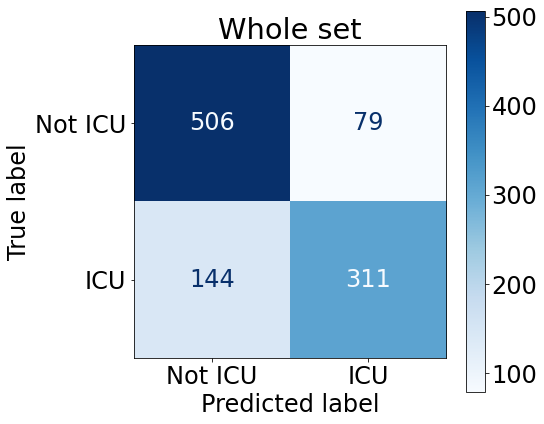

In [414]:
fig, ax = plt.subplots(figsize=(7,7))
plt.rcParams.update({'font.size': 24})

disp = plot_confusion_matrix(clf_18, features, Y,
                             display_labels=['Not ICU','ICU'],
                             cmap=plt.cm.Blues,
                             ax=ax)
disp.ax_.set_title('Whole set')

label_font = {'size':'24'}  # Adjust to fit
ax.set_xlabel('Predicted label', fontdict=label_font);
ax.set_ylabel('True label', fontdict=label_font);



[Text(643.8461538461538, 475.65000000000003, 'X[4] <= 0.893\ngini = 0.492\nsamples = 100.0%\nvalue = [0.562, 0.438]'),
 Text(343.38461538461536, 339.75, 'X[2] <= -0.67\ngini = 0.431\nsamples = 71.2%\nvalue = [0.686, 0.314]'),
 Text(171.69230769230768, 203.85000000000002, 'X[8] <= -1.363\ngini = 0.486\nsamples = 15.2%\nvalue = [0.418, 0.582]'),
 Text(85.84615384615384, 67.94999999999999, 'gini = 0.234\nsamples = 3.6%\nvalue = [0.865, 0.135]'),
 Text(257.53846153846155, 67.94999999999999, 'gini = 0.404\nsamples = 11.6%\nvalue = [0.281, 0.719]'),
 Text(515.0769230769231, 203.85000000000002, 'X[1] <= 1.554\ngini = 0.367\nsamples = 56.1%\nvalue = [0.758, 0.242]'),
 Text(429.23076923076917, 67.94999999999999, 'gini = 0.333\nsamples = 53.4%\nvalue = [0.789, 0.211]'),
 Text(600.9230769230769, 67.94999999999999, 'gini = 0.245\nsamples = 2.7%\nvalue = [0.143, 0.857]'),
 Text(944.3076923076923, 339.75, 'X[17] <= 1.249\ngini = 0.382\nsamples = 28.8%\nvalue = [0.258, 0.742]'),
 Text(858.46153846153

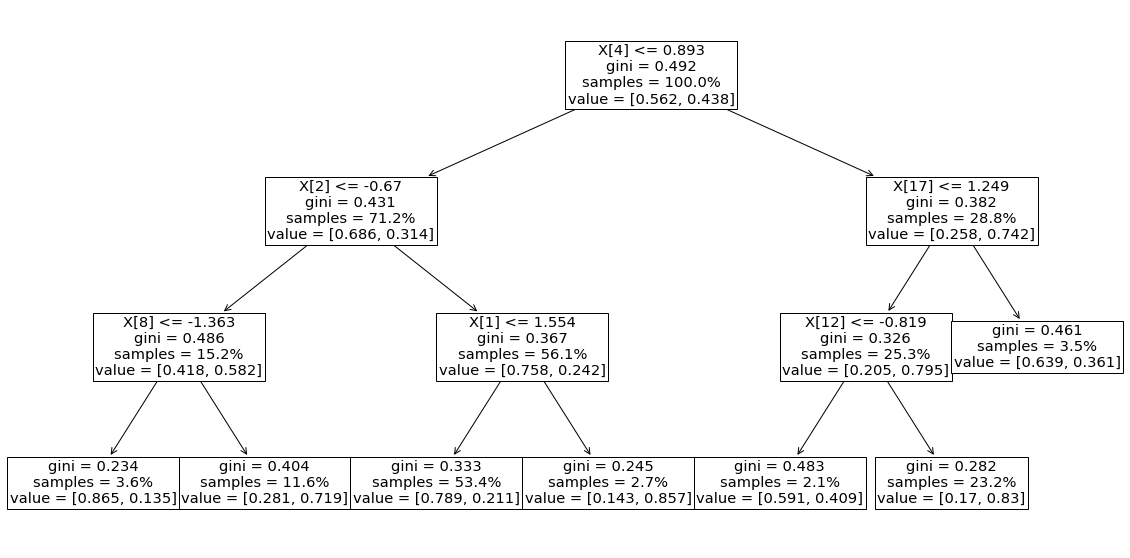

In [415]:
plt.figure(figsize=(20,10))
tree.plot_tree(clf_18, proportion=True) 

### Cross-val

In [307]:
# cross-validation

from sklearn.model_selection import cross_val_score, cross_val_predict

cv_scores = cross_val_predict(clf_18, features, Y, cv=400)0,

print(confusion_matrix(Y, cv_scores))
print(classification_report(Y, cv_scores))

[[518  67]
 [163 292]]
              precision    recall  f1-score   support

         0.0       0.76      0.89      0.82       585
         1.0       0.81      0.64      0.72       455

    accuracy                           0.78      1040
   macro avg       0.79      0.76      0.77      1040
weighted avg       0.78      0.78      0.77      1040



## Mid-layer features

In [74]:
mid_features_class1_path = "./output/1-2_icu_1024feat.csv"
mid_features_class2_path = "./output/1-2_not_icu_1024feat.csv"

In [75]:
mid_features_class1 = pd.read_csv(mid_features_class1_path)
mid_features_class1 = mid_features_class1.iloc[:,1:].to_numpy()

print(mid_features_class1.shape)

(35, 1024)


In [76]:
mid_features_class2 = pd.read_csv(mid_features_class2_path)
mid_features_class2 = mid_features_class2.iloc[:,1:].to_numpy()

print(mid_features_class2.shape)

(65, 1024)


In [77]:
# concatenate
mid_features = np.concatenate((mid_features_class1, mid_features_class2), axis=0)
print(mid_features.shape)

#normalize
mid_features_norm = (mid_features - mid_features.mean(axis=0)) / mid_features.std(axis=0)  
mid_features_norm[np.isnan(mid_features_norm)] = 0
print(mid_features_norm.shape)

(100, 1024)
(100, 1024)


/home/barth/anaconda3/envs/covid_test/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


In [78]:
features = mid_features_norm

max_depth_tree = 3
min_samples_leaf = 15
clf = tree.DecisionTreeClassifier(class_weight={0:1,1:1},max_depth=max_depth_tree, min_samples_leaf=min_samples_leaf)

in_training_loss = True
train_test_ratio = 0.2

if in_training_loss:
    clf = clf.fit(features, Y)
    y_pred = clf.predict(features)

    print(confusion_matrix(Y, y_pred))
    print(classification_report(Y, y_pred))

    feature_lst=[i for i in clf.tree_.feature if i != -2]
    print(len(feature_lst),'features')

else:
  X_train, X_test, y_train, y_test = \
  train_test_split(features, Y, test_size=train_test_ratio)

  clf = clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)

  print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test, y_pred))

[[65  0]
 [15 20]]
              precision    recall  f1-score   support

         0.0       0.81      1.00      0.90        65
         1.0       1.00      0.57      0.73        35

    accuracy                           0.85       100
   macro avg       0.91      0.79      0.81       100
weighted avg       0.88      0.85      0.84       100

4 features


[Text(558.0, 475.65000000000003, 'X[528] <= -0.519\ngini = 0.455\nsamples = 100.0%\nvalue = [0.65, 0.35]'),
 Text(279.0, 339.75, 'X[908] <= -0.164\ngini = 0.388\nsamples = 38.0%\nvalue = [0.263, 0.737]'),
 Text(139.5, 203.85000000000002, 'gini = 0.494\nsamples = 18.0%\nvalue = [0.556, 0.444]'),
 Text(418.5, 203.85000000000002, 'gini = 0.0\nsamples = 20.0%\nvalue = [0.0, 1.0]'),
 Text(837.0, 339.75, 'X[335] <= 0.354\ngini = 0.2\nsamples = 62.0%\nvalue = [0.887, 0.113]'),
 Text(697.5, 203.85000000000002, 'X[561] <= 0.224\ngini = 0.042\nsamples = 47.0%\nvalue = [0.979, 0.021]'),
 Text(558.0, 67.94999999999999, 'gini = 0.0\nsamples = 32.0%\nvalue = [1.0, 0.0]'),
 Text(837.0, 67.94999999999999, 'gini = 0.124\nsamples = 15.0%\nvalue = [0.933, 0.067]'),
 Text(976.5, 203.85000000000002, 'gini = 0.48\nsamples = 15.0%\nvalue = [0.6, 0.4]')]

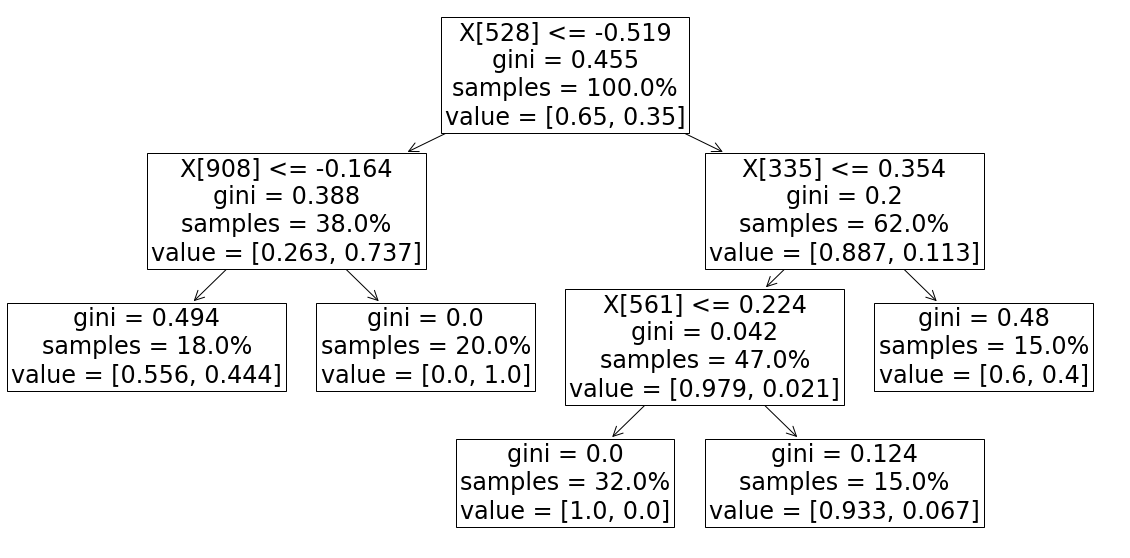

In [79]:
plt.figure(figsize=(20,10))
tree.plot_tree(clf, proportion=True) 

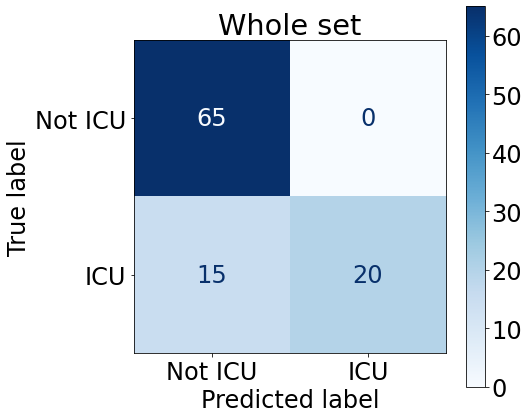

In [80]:
fig, ax = plt.subplots(figsize=(7,7))
plt.rcParams.update({'font.size': 24})

disp = plot_confusion_matrix(clf, features, Y,
                             display_labels=['Not ICU','ICU'],
                             cmap=plt.cm.Blues,
                             ax=ax)
disp.ax_.set_title('Whole set')

label_font = {'size':'24'}  # Adjust to fit
ax.set_xlabel('Predicted label', fontdict=label_font);
ax.set_ylabel('True label', fontdict=label_font);

### Cross-val

In [81]:
# cross-validation

from sklearn.model_selection import cross_val_score, cross_val_predict

cv_scores = cross_val_predict(clf, features, Y, cv=35)

print(confusion_matrix(Y, cv_scores))
print(classification_report(Y, cv_scores))

[[60  5]
 [16 19]]
              precision    recall  f1-score   support

         0.0       0.79      0.92      0.85        65
         1.0       0.79      0.54      0.64        35

    accuracy                           0.79       100
   macro avg       0.79      0.73      0.75       100
weighted avg       0.79      0.79      0.78       100



## Heatmap features

In [350]:
heatmaps_features_class1_path = "./output/went_icu_sel_proc_heatmap_feat.csv"

heatmaps_features_class2_path = "./output/not_went_icu_sel_proc_heatmap_feat.csv"

In [351]:
heatmaps_features_class1 = pd.read_csv(heatmaps_features_class1_path)
heatmaps_features_class1 = heatmaps_features_class1.iloc[:,1:].to_numpy()

print(heatmaps_features_class1.shape)

(455, 396)


In [352]:
heatmaps_features_class2 = pd.read_csv(heatmaps_features_class2_path)
heatmaps_features_class2 = heatmaps_features_class2.iloc[:,1:].to_numpy()

print(heatmaps_features_class2.shape)

(585, 396)


In [353]:
#concatenate
heatmaps_features = np.concatenate((heatmaps_features_class1, heatmaps_features_class2), axis=0)
print(heatmaps_features.shape)

#normalize
heatmaps_features_norm = (heatmaps_features - heatmaps_features.mean(axis=0)) / heatmaps_features.std(axis=0)  
print(heatmaps_features_norm.shape)

(1040, 396)
(1040, 396)


In [354]:
feature_name_heatmap_path = './output/features_names_heatmap.txt'

feature_names_heatmaps = []
with open(feature_name_heatmap_path,'r') as f:
    for line in f:
        feature_names_heatmaps.append(str(line))
        
print(len(feature_names_heatmaps))
print(feature_names_heatmaps[0:5])

396
['Atelectasis_whole_image_entropy\n', 'Atelectasis_whole_image_energy\n', 'Atelectasis_long1_entropy\n', 'Atelectasis_long1_energy\n', 'Atelectasis_long2_entropy\n']


In [355]:
idx_with_quad = []

for i in range(len(feature_names_heatmaps)):
    if ('long' in feature_names_heatmaps[i]) or ('trans' in feature_names_heatmaps[i]):
        idx_with_quad.append(i)

print(len(idx_with_quad))

#heatmaps_features_no_quad = np.delete(heatmaps_features, idx_with_quad, 1)
heatmaps_features_no_quad = heatmaps_features[:,idx_with_quad]
#data_test = np.delete(data_test, idx_with_quad, 1)

print(heatmaps_features_no_quad.shape)

#print(len(feature_names))

feature_names_heatmap_no_quad = [i for i in feature_names_heatmaps if ('long' in i) or ('trans' in i)]

print(len(feature_names_heatmap_no_quad))

heatmaps_features=heatmaps_features_no_quad

heatmaps_features_norm = (heatmaps_features - heatmaps_features.mean(axis=0)) / heatmaps_features.std(axis=0)  
print(heatmaps_features_norm.shape)

feature_names_heatmaps = feature_names_heatmap_no_quad

144
(1040, 144)
144
(1040, 144)


In [389]:
# Filter only entropy (reject energy)

heatmaps_features_norm = heatmaps_features_norm[:,np.arange(0,len(feature_names_heatmaps),2,)]
feature_names_heatmaps = [i for i in feature_names_heatmaps if 'entropy' in i]

In [416]:
features = heatmaps_features_norm
features_names_ = feature_names_heatmaps# feature_names_heatmaps

max_depth_tree = 3
min_samples_leaf = 20
clf = tree.DecisionTreeClassifier(class_weight={0:1,1:1},max_depth=max_depth_tree, min_samples_leaf=min_samples_leaf)

#class_weight={0:10,1:1}

in_training_loss = True
train_test_ratio = 0.2

if in_training_loss:
    clf = clf.fit(features, Y)
    y_pred = clf.predict(features)

    print(confusion_matrix(Y, y_pred))
    print(classification_report(Y, y_pred))

    feature_lst=[i for i in clf.tree_.feature if i != -2]

    print('features =', feature_lst)
    print('features name=', list(itemgetter(*feature_lst)(features_names_)))

else:
  X_train, X_test, y_train, y_test = \
  train_test_split(features, Y, test_size=train_test_ratio)

  clf = clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)

  print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test, y_pred))

[[507  78]
 [149 306]]
              precision    recall  f1-score   support

         0.0       0.77      0.87      0.82       585
         1.0       0.80      0.67      0.73       455

    accuracy                           0.78      1040
   macro avg       0.78      0.77      0.77      1040
weighted avg       0.78      0.78      0.78      1040

features = [31, 18, 5, 20, 14, 42, 47]
features name= ['Fibrosis_trans2_entropy\n', 'Effusion_trans1_entropy\n', 'Cardiomegaly_long2_entropy\n', 'Emphysema_long1_entropy\n', 'Edema_trans1_entropy\n', 'Infiltration_trans1_entropy\n', 'Lung Lesion_trans2_entropy\n']


[Text(558.0, 475.65000000000003, 'X[31] <= -0.505\ngini = 0.492\nsamples = 100.0%\nvalue = [0.562, 0.438]'),
 Text(279.0, 339.75, 'X[18] <= -0.352\ngini = 0.338\nsamples = 16.1%\nvalue = [0.216, 0.784]'),
 Text(139.5, 203.85000000000002, 'X[5] <= -0.481\ngini = 0.075\nsamples = 7.4%\nvalue = [0.039, 0.961]'),
 Text(69.75, 67.94999999999999, 'gini = 0.0\nsamples = 5.5%\nvalue = [0.0, 1.0]'),
 Text(209.25, 67.94999999999999, 'gini = 0.255\nsamples = 1.9%\nvalue = [0.15, 0.85]'),
 Text(418.5, 203.85000000000002, 'X[20] <= -0.707\ngini = 0.464\nsamples = 8.7%\nvalue = [0.367, 0.633]'),
 Text(348.75, 67.94999999999999, 'gini = 0.255\nsamples = 1.9%\nvalue = [0.85, 0.15]'),
 Text(488.25, 67.94999999999999, 'gini = 0.353\nsamples = 6.7%\nvalue = [0.229, 0.771]'),
 Text(837.0, 339.75, 'X[14] <= -0.09\ngini = 0.467\nsamples = 83.9%\nvalue = [0.629, 0.371]'),
 Text(697.5, 203.85000000000002, 'X[42] <= -0.297\ngini = 0.332\nsamples = 52.1%\nvalue = [0.79, 0.21]'),
 Text(627.75, 67.94999999999999,

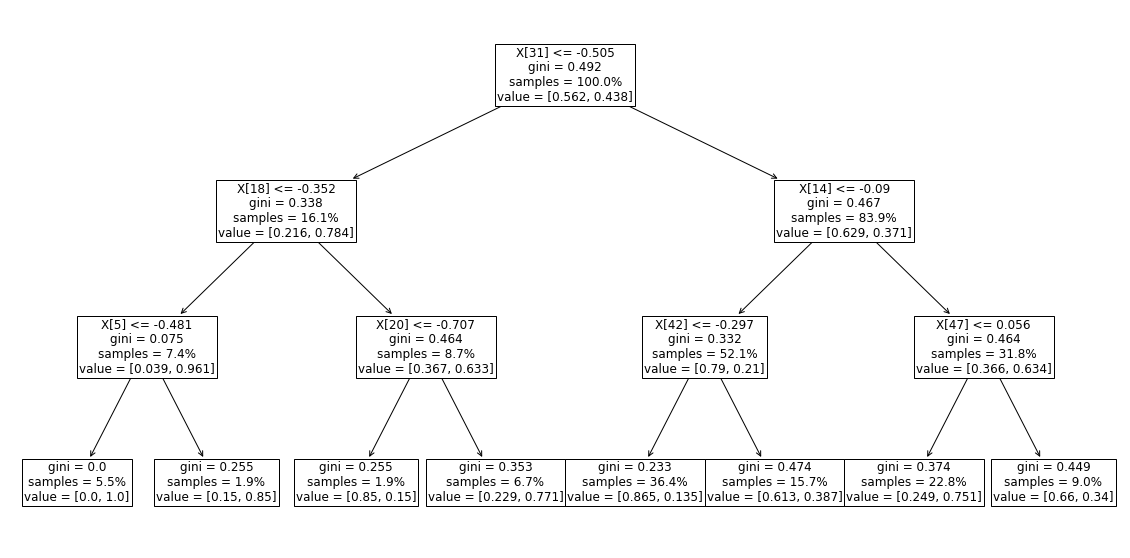

In [417]:
plt.figure(figsize=(20,10))
tree.plot_tree(clf, proportion=True) 

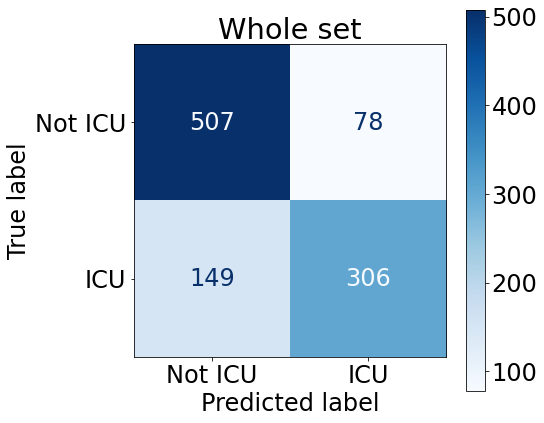

In [410]:
fig, ax = plt.subplots(figsize=(7,7))
plt.rcParams.update({'font.size': 24})

disp = plot_confusion_matrix(clf, features, Y,
                             display_labels=['Not ICU','ICU'],
                             cmap=plt.cm.Blues,
                             ax=ax)
disp.ax_.set_title('Whole set')

label_font = {'size':'24'}  # Adjust to fit
ax.set_xlabel('Predicted label', fontdict=label_font);
ax.set_ylabel('True label', fontdict=label_font);


### Cross-val

In [411]:
# cross-validation

from sklearn.model_selection import cross_val_score, cross_val_predict

cv_scores = cross_val_predict(clf, heatmaps_features_norm, Y, cv=400)

print(confusion_matrix(Y, cv_scores))
print(classification_report(Y, cv_scores))

[[458 127]
 [158 297]]
              precision    recall  f1-score   support

         0.0       0.74      0.78      0.76       585
         1.0       0.70      0.65      0.68       455

    accuracy                           0.73      1040
   macro avg       0.72      0.72      0.72      1040
weighted avg       0.72      0.73      0.72      1040



# BIMCV Pred

In [309]:
import pandas as pd

#metadata = pd.read_csv("../datasets/BIMCV-COVID19/BIMCV/derivatives/labels/labels_covid19_posi.tsv", sep='\t')
metadata = pd.read_csv("./output/bimcv_labels_covid19_posi.tsv", sep='\t')

In [310]:
data_test_name = "./output/bimcv_full_18feat.csv"

data_test = pd.read_csv(data_test_name)
data_test = data_test.iloc[:,1:].to_numpy()

print(data_test.shape)

(1312, 18)


In [311]:
data_test_norm = (data_test - data_test.mean(axis=0)) / data_test.std(axis=0)  
data_test_norm[np.isnan(data_test_norm)] = 0

In [312]:
#predict on test data

#RUN THE CLASSIFIER ON THE LAST LAYER FEATURES (FIRST SECTION) FIRST

y_pred = clf_18.predict(data_test_norm)

print('no_preds =', len(y_pred))
print('label 0 =', len([a for a in y_pred if a==0]))
print('label 1 =', len([a for a in y_pred if a==1]))

no_preds = 1312
label 0 = 806
label 1 = 506


In [313]:
output_pred_pth = './output/bim_predictions.txt'
output_pred_file = open(output_pred_pth,'w')


for y in y_pred:
    output_pred_file.write(str(int(y)))
    output_pred_file.write(',')
output_pred_file.close()

In [314]:
##ONLY EXECUTE WITH DATASET PRESENT

# list_of_imgs = os.listdir('../datasets/BIMCV-COVID19/BIMCV_processed/masked_filtered')

# output_features_names_pth = './output/bim_file_names.txt'
# file_features_names = open(output_features_names_pth,'w')


# for file_name in list_of_imgs:
#     file_features_names.write(file_name)
#     file_features_names.write(',')
# file_features_names.close()

In [325]:
# load name of files

file_name = 'bim_file_names.txt'

f = open(os.path.join('./output/',file_name), "r")
lst_of_files = f.read()
lst_of_files = lst_of_files.split(',')
lst_of_files = [i for i in lst_of_files[:-1]]

print('no of files =', len(lst_of_files))

no of files = 1312


In [326]:
# load predictions

file_name = 'bim_predictions.txt'

f = open(os.path.join('./output/',file_name), "r")
preds = f.read()
preds = preds.split(',')
preds = [int(i) for i in preds[:-1]]

print('no of predictions =', len(preds))

no of predictions = 1312


In [327]:
n_0 = len([a for a in preds if a==0])
n_1 = len([a for a in preds if a==1])

print('no_preds =', len(preds))
print('label 0 =', n_0)
print('label 1 =', n_1)

no_preds = 1312
label 0 = 806
label 1 = 506


In [328]:
#Get list with name of studies

pd.options.display.max_colwidth = 1000
lst_of_sess = []
for file_ in lst_of_files:
    idx = file_.find('ses-')
    lst_of_sess.append(file_[idx : idx+10])
    
column_ = 'Localizations'# 'Labels'#

In [329]:
#Example of filtering the data

import re

a = metadata.loc[metadata['ReportID'] == lst_of_sess[25]][column_]
a = a.to_string()

print(a)

a = re.findall(r'\w+', a) 
a = [i for i in a if not i.isdigit()]
a = [i for i in a if i!='t']
#a = [i.replace('t','') for i in a]

print(a)

230    ['loc costophrenic angle'\t 'loc bilateral'\t 'loc hilar'\t 'loc basal']
['loc', 'costophrenic', 'angle', 'loc', 'bilateral', 'loc', 'hilar', 'loc', 'basal']


In [330]:
dic_1 = {}

for n in range(len(lst_of_sess)):
    
    if preds[n]==1:
        a = metadata.loc[metadata['ReportID'] == lst_of_sess[n]][column_]
        a = a.to_string() 
        
        a = re.findall(r'\w+', a) 
        a = [i for i in a if not i.isdigit()]
        a = [i for i in a if i!='t']
        #a = [i.replace('t','') for i in a]
        
        for word in a:
            if word not in list(dic_1.keys()):
                dic_1[word] = 0
            else:
                dic_1[word] += 1
                
    
    

In [331]:
sort_orders_dic_1 = sorted(dic_1.items(), key=lambda x: x[1], reverse=True)

for i in sort_orders_dic_1:
    print(i[0], i[1] )

loc 2303
lung 450
field 450
right 265
left 240
bilateral 224
peripheral 218
lower 204
lobe 155
middle 152
upper 134
basal 132
pleural 122
angle 101
cardiac 96
costophrenic 96
lobar 80
hemithorax 61
hilar 29
Series 24
diffuse 23
mediastinum 22
central 19
bronchi 17
aortic 15
retrocardiac 14
apical 13
bone 13
perihilar 12
diaphragm 10
tracheal 10
fissure 10
vein 7
paracardiac 6
cardiophrenic 4
subsegmental 4
lingula 4
superior 3
cave 3
subclavian 3
soft 3
tissue 3
minor 3
button 3
vertebrae 3
pectoral 2
humerus 2
NaN 2
subcutaneous 1
peribronchi 1
subpleural 1
lumbar 1
infrahilar 1
dorsal 1
humeral 0
head 0
rotator 0
cuff 0
brachiocephalic 0
veins 0
cervical 0
column 0
suprahilar 0
rib 0


In [332]:
dic_0 = {}

for n in range(len(lst_of_sess)):
    
    if preds[n]==0:
        a = metadata.loc[metadata['ReportID'] == lst_of_sess[n]][column_]
        a = a.to_string() 
        
        a = re.findall(r'\w+', a) 
        a = [i for i in a if not i.isdigit()]
        a = [i for i in a if i!='t']
        #a = [i.replace('t','') for i in a]
        
        for word in a:
            if word not in list(dic_0.keys()):
                dic_0[word] = 0
            else:
                dic_0[word] += 1

    
                

In [333]:
sort_orders_dic_0 = sorted(dic_0.items(), key=lambda x: x[1], reverse=True)

for i in sort_orders_dic_1:
    for p in sort_orders_dic_0:
        if i[0] == p[0]:
            print(p[0] , p[1])

# for i in sort_orders:
#     print(i[0], i[1])

loc 3193
lung 545
field 545
right 376
left 309
bilateral 225
peripheral 271
lower 248
lobe 198
middle 174
upper 171
basal 183
pleural 193
angle 150
cardiac 179
costophrenic 143
lobar 114
hemithorax 89
hilar 70
Series 47
diffuse 16
mediastinum 62
central 21
bronchi 25
aortic 28
retrocardiac 23
apical 13
bone 41
perihilar 18
diaphragm 17
tracheal 12
fissure 22
vein 12
paracardiac 4
cardiophrenic 6
subsegmental 8
lingula 4
superior 10
cave 10
subclavian 1
soft 11
tissue 11
minor 7
button 5
vertebrae 8
pectoral 7
humerus 6
NaN 3
subcutaneous 1
peribronchi 0
subpleural 3
lumbar 1
infrahilar 4
dorsal 6
humeral 2
head 1
rotator 0
cuff 0
brachiocephalic 0
veins 0
cervical 0
column 2
suprahilar 0
rib 13


In [334]:
for i in sort_orders_dic_1:
    for p in sort_orders_dic_0:
        if i[0] == p[0]:
            if p[1] !=0:
                print(p[0], (i[1]/n_1)/(p[1]/n_0))

loc 1.1488928968878314
lung 1.315226456829967
field 1.315226456829967
right 1.1226452779413
left 1.2371925246555893
bilateral 1.5858058849363195
peripheral 1.2813616673716144
lower 1.3102766798418972
lobe 1.2469557232403083
middle 1.391486075144246
upper 1.248225966761436
basal 1.1489665003563792
pleural 1.006901636322677
angle 1.0725428194993412
cardiac 0.8542848941197253
costophrenic 1.0693496227093064
lobar 1.1178142985923307
hemithorax 1.091752897810543
hilar 0.6599096555618295
Series 0.8133882768480363
diffuse 2.2897727272727275
mediastinum 0.5652173913043478
central 1.4411820063993976
bronchi 1.0831620553359684
aortic 0.8533314511575381
retrocardiac 0.969582402474652
apical 1.5928853754940713
bone 0.5050612166200713
perihilar 1.061923583662714
diaphragm 0.9369913973494536
tracheal 1.3274044795783926
fissure 0.7240388070427596
vein 0.9291831357048749
paracardiac 2.3893280632411065
cardiophrenic 1.061923583662714
subsegmental 0.7964426877470355
lingula 1.592885375494071
superior 0.